## EDA_Ingresos.ipynb##

Introducción

Contexto General

Los datos analizados en este notebook provienen del **#Ente Nacional de Comunicaciones (ENACOM) de Argentina#**, el organismo regulador de las telecomunicaciones en el país. Esta información permite **evaluar el estado y la evolución del acceso a internet en Argentina**.

## Descripción del Conjunto de Datos ## 

Este análisis se centra en la hoja de datos "Ingresos generados por los servicios de internet en miles de pesos.", que 
proporciona información detallada sobre el impacto económico del acceso a internet.

Objetivo del Análisis

El propósito de este análisis es explorar los datos económicos para entender tendencias en ingresos, evaluar posibles 
correlaciones con otros factores y generar insights que puedan ser útiles para estudios de mercado y políticas regulatorias.


In [40]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Ingresos .csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [41]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo', 'Trimestre_Label']


In [42]:
# Verificar la carga
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        42 non-null     int64 
 1   Trimestre                  42 non-null     int64 
 2   Ingresos (miles de pesos)  42 non-null     int64 
 3   Periodo                    42 non-null     object
 4   Trimestre_Label            42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB
None


In [43]:
print(df.head())

    Año  Trimestre  Ingresos (miles de pesos)        Periodo Trimestre_Label
0  2024          2                  442032166   Abr-Jun 2024              Q2
1  2024          1                  346198986   Ene-Mar 2024              Q1
2  2023          4                  167376014   Oct-Dic 2023              Q4
3  2023          3                  133106593  Jul-Sept 2023              Q3
4  2023          2                  118060280   Jun-Mar 2023              Q2


In [44]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [45]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [46]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        42 non-null     int64 
 1   Trimestre                  42 non-null     int64 
 2   Ingresos (miles de pesos)  42 non-null     int64 
 3   Periodo                    42 non-null     object
 4   Trimestre_Label            42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB
None


In [47]:
import sweetviz as sv
from skimpy import skim

In [48]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año       │  0 │    0 │     2019 │    3.729 │    2014 │    2016 │     2019 │     2021 │      2033 │  ▇▆▅▁  │  │
│ │ Trimestre │  0 │    0 │    2.452 │    1.131 │       1 │    1.25 │        2 │        3 │         4 │ ▇ ▇ ▇▇ │  │
│ │ Ingresos  │  0 │    0 │ 50020000 │ 87100000 │ 2984000 │ 7055000 │ 20480000 │ 44850000 │ 442000000 │   ▇▁   │  │
│ │ (miles de │    │      │          │          │         │         │          │          │           │        │  │
│ │ pesos)    │    │      │          │          │         │         │          │          │           │        │  │
│ └───────────┴────┴──────┴──────────┴──────────┴─────────┴─────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Periodo   │  0 │    0 │ Abr-Jun   │ Jul-Sept  │ Abr-Jun   │ Oct-Dic   │      12.2 │         2 │         84 │  │
│ │           │    │      │ 2024      │ 2023      │ 2014      │ 2023      │           │           │            │  │
│ │ Trimestre │  0 │    0 │ Q2        │ Q2        │ Q1        │ Q4        │         2 │         1 │         42 │  │
│ │ _Label    │    │      │           │           │           │           │           │           │            │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año  Trimestre  Ingresos (miles de pesos)       Periodo  \
count     42.000000  42.000000               4.200000e+01            42   
unique          NaN        NaN                        NaN            42   
top             NaN        NaN                        NaN  Abr-Jun 2024   
freq            NaN        NaN                        NaN             1   
mean    2019.000000   2.452381               5.001648e+07           NaN   
std        3.728597   1.130560               8.710208e+07           NaN   
min     2014.000000   1.000000               2.984054e+06           NaN   
25%     2016.000000   1.250000               7.055326e+06           NaN   
50%     2019.000000   2.000000               2.047526e+07           NaN   
75%     2021.000000   3.000000               4.485090e+07           NaN   
max     2033.000000   4.000000               4.420322e+08           NaN   

       Trimestre_Label  


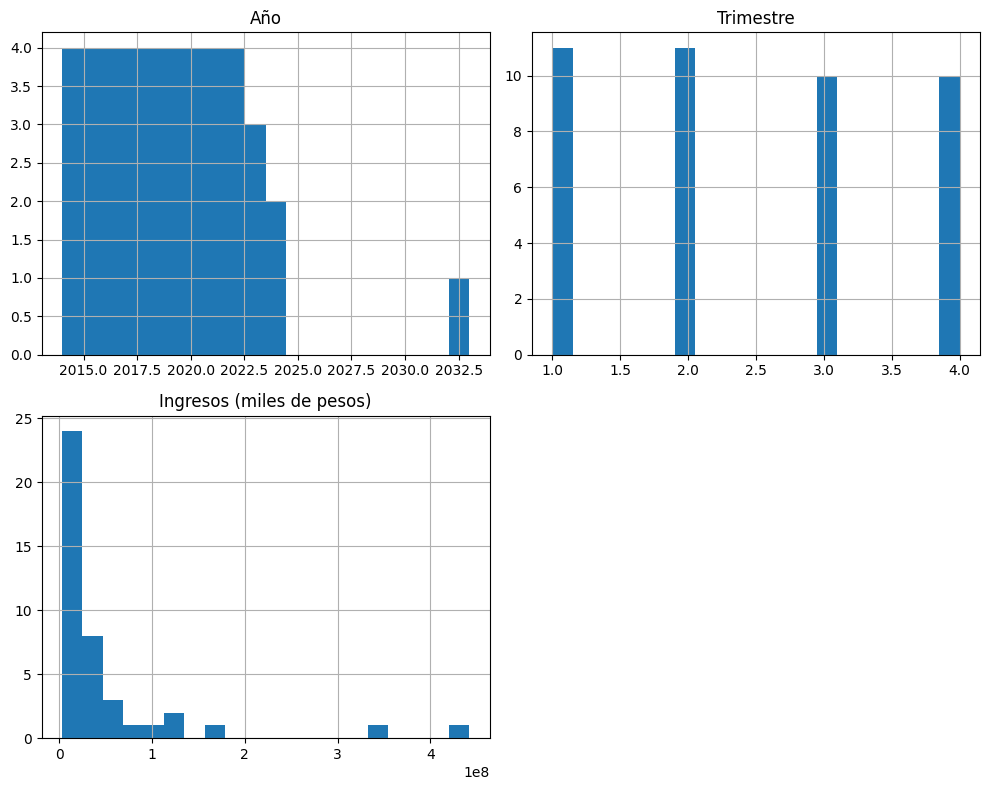

In [49]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

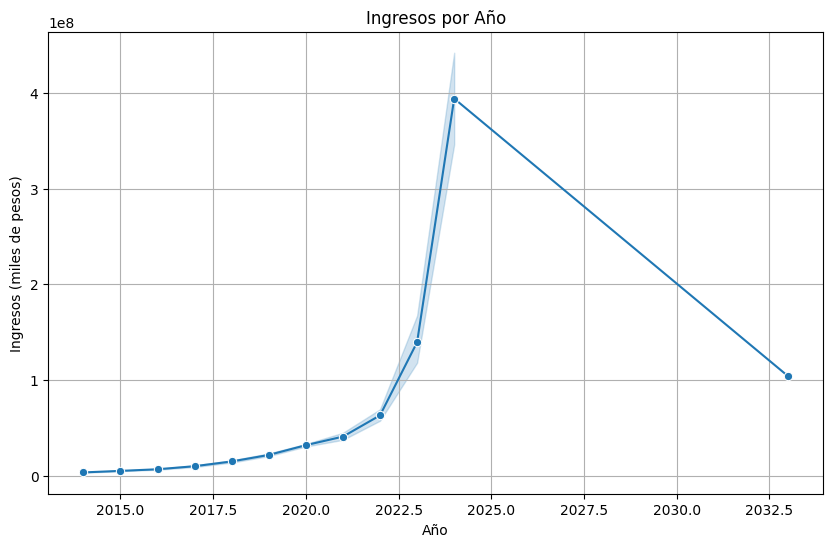

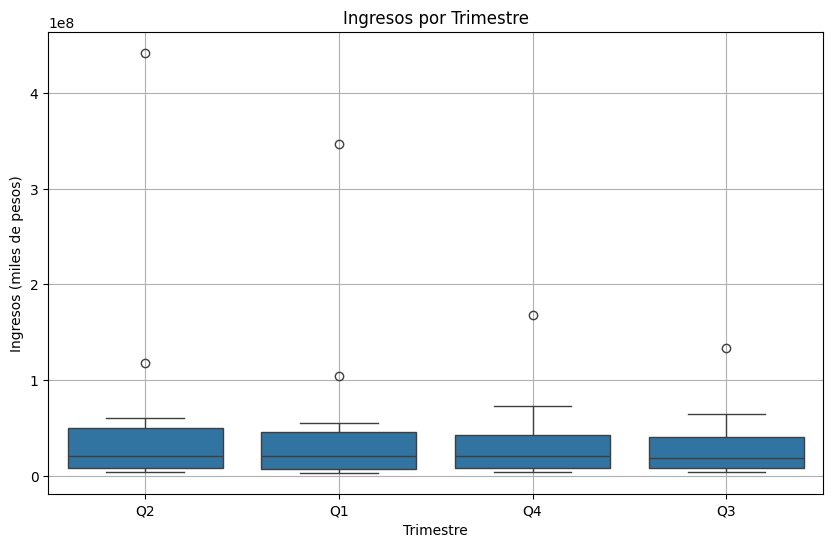

Estadísticas descriptivas de Ingresos por Año:
      count          mean           std          min           25%  \
Año                                                                  
2014    4.0  3.420987e+06  4.070650e+05    2984054.0  3.199126e+06   
2015    4.0  5.027203e+06  2.982941e+05    4701790.0  4.832736e+06   
2016    4.0  6.716876e+06  6.502564e+05    5936844.0  6.384891e+06   
2017    4.0  9.917993e+06  1.044189e+06    8701201.0  9.434285e+06   
2018    4.0  1.488490e+07  1.483758e+06   13171459.0  1.403246e+07   
2019    4.0  2.169313e+07  1.755247e+06   20207413.0  2.060919e+07   
2020    4.0  3.189646e+07  1.478325e+06   29946216.0  3.148464e+07   
2021    4.0  4.084597e+07  4.089829e+06   36676371.0  3.784884e+07   
2022    4.0  6.304227e+07  7.246870e+06   55219313.0  5.911945e+07   
2023    3.0  1.395143e+08  2.527458e+07  118060280.0  1.255834e+08   
2024    2.0  3.941156e+08  6.776429e+07  346198986.0  3.701573e+08   
2033    1.0  1.041350e+08           NaN  10

In [50]:
# Graficar "Año e Ingresos"
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Año', y='Ingresos (miles de pesos)', marker='o')
plt.title('Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

# Graficar "Trimestre e Ingresos"
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Trimestre_Label', y='Ingresos (miles de pesos)')
plt.title('Ingresos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

# Calcular estadísticas descriptivas para "Año e Ingresos"
ingresos_por_ano = df.groupby('Año')['Ingresos (miles de pesos)'].describe()
print("Estadísticas descriptivas de Ingresos por Año:")
print(ingresos_por_ano)

# Calcular estadísticas descriptivas para "Trimestre e Ingresos"
ingresos_por_trimestre = df.groupby('Trimestre_Label')['Ingresos (miles de pesos)'].describe()
print("\nEstadísticas descriptivas de Ingresos por Trimestre:")
print(ingresos_por_trimestre)


Matriz de correlación entre columnas numéricas:
                                Año  Trimestre  Ingresos (miles de pesos)
Año                        1.000000  -0.144650                   0.594475
Trimestre                 -0.144650   1.000000                  -0.115954
Ingresos (miles de pesos)  0.594475  -0.115954                   1.000000


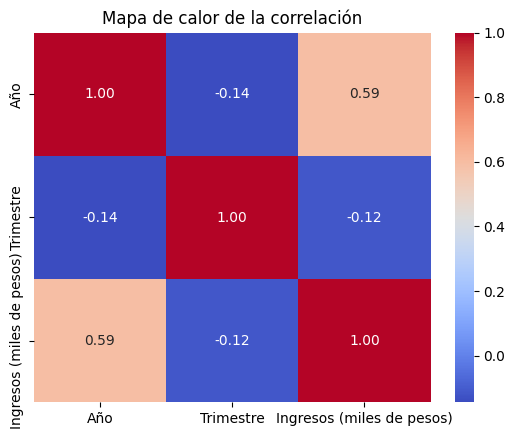

In [51]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [52]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019     0   0   1   0
Jul-Sept 2020    

Tabla de contingencia entre Periodo y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Periodo                        
Abr-Jun 2014      0   1   0   0
Abr-Jun 2015      0   1   0   0
Abr-Jun 2016      0   1   0   0
Abr-Jun 2017      0   1   0   0
Abr-Jun 2018      0   1   0   0
Abr-Jun 2019      0   1   0   0
Abr-Jun 2020      0   1   0   0
Abr-Jun 2021      0   1   0   0
Abr-Jun 2022      0   1   0   0
Abr-Jun 2024      0   1   0   0
Ene-Mar 2014      1   0   0   0
Ene-Mar 2015      1   0   0   0
Ene-Mar 2016      1   0   0   0
Ene-Mar 2017      1   0   0   0
Ene-Mar 2018      1   0   0   0
Ene-Mar 2019      1   0   0   0
Ene-Mar 2020      1   0   0   0
Ene-Mar 2021      1   0   0   0
Ene-Mar 2022      1   0   0   0
Ene-Mar 2023      1   0   0   0
Ene-Mar 2024      1   0   0   0
Jul-Sept 2014     0   0   1   0
Jul-Sept 2015     0   0   1   0
Jul-Sept 2016     0   0   1   0
Jul-Sept 2017     0   0   1   0
Jul-Sept 2018     0   0   1   0
Jul-Sept 2019     0   0   1   0
Jul-Sept 2020    

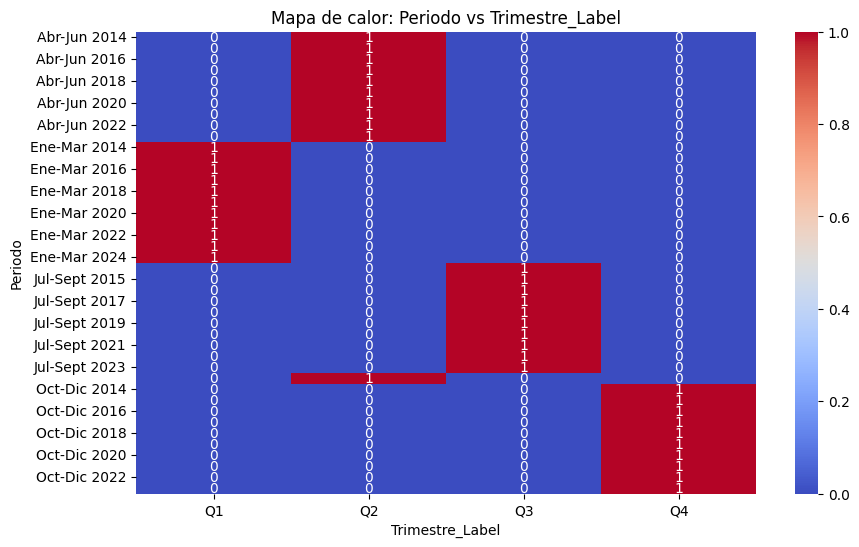

Tabla de contingencia entre Trimestre_Label y Periodo:
Periodo          Abr-Jun 2014  Abr-Jun 2015  Abr-Jun 2016  Abr-Jun 2017  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2018  Abr-Jun 2019  Abr-Jun 2020  Abr-Jun 2021  \
Trimestre_Label                                                           
Q1                          0             0             0             0   
Q2                          1             1             1             1   
Q3                          0             0             0             0   
Q4                          0             0             0             0   

Periodo          Abr-Jun 2022  Abr-Jun 2024

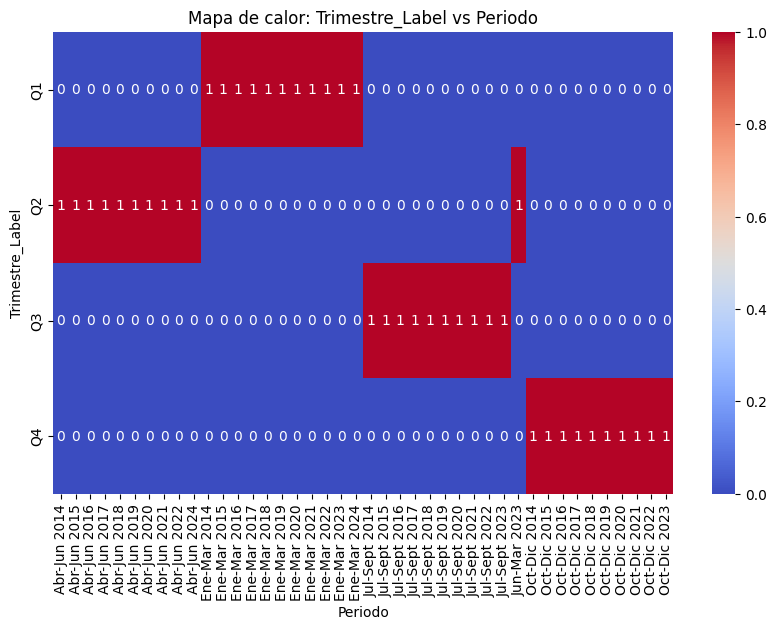

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [54]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
         Año  Trimestre  Ingresos (miles de pesos)
0   1.357242  -0.404989                   4.555202
1   1.357242  -1.300229                   3.441625
2   1.085793   1.385490                   1.363712
3   1.085793   0.490250                   0.965503
4   1.085793  -0.404989                   0.790665
5   3.800277  -1.300229                   0.628854
6   0.814345   1.385490                   0.260601
7   0.814345   0.490250                   0.163496
8   0.814345  -0.404989                   0.120883
9   0.814345  -1.300229                   0.060457
10  0.542897   1.385490                  -0.052854
11  0.542897   0.490250                  -0.081532
12  0.542897  -0.404989                  -0.136846
13  0.542897  -1.300229                  -0.155011
14  0.271448   1.385490                  -0.191459
15  0.271448   0.490250                  -0.209380
16  0.271448  -0.404989                  -0.208160
17  0.271448  -1.300229                  -0.2

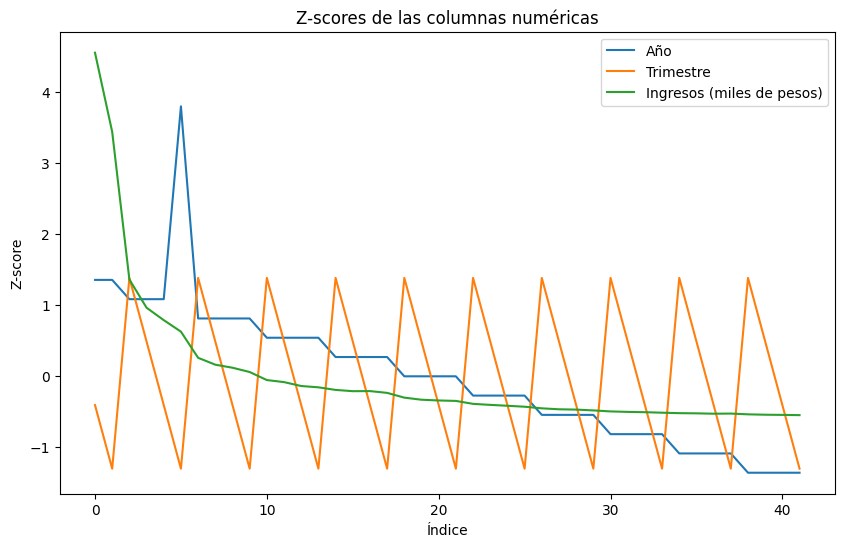

In [55]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [56]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Jun-Mar 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2014     1
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    11
Q1    11
Q4    10
Q3    10
Name: count, d

In [57]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


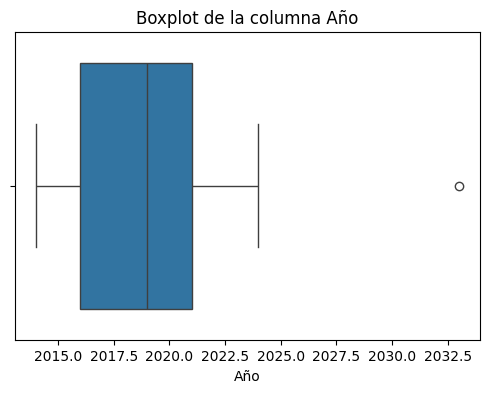

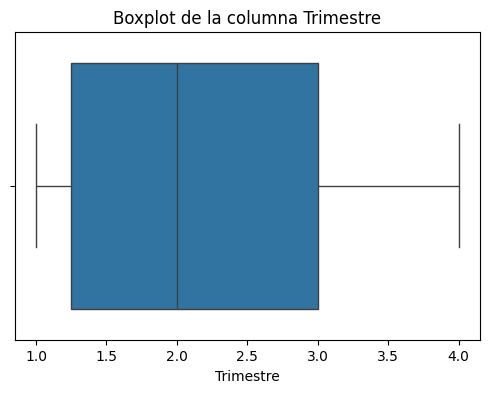

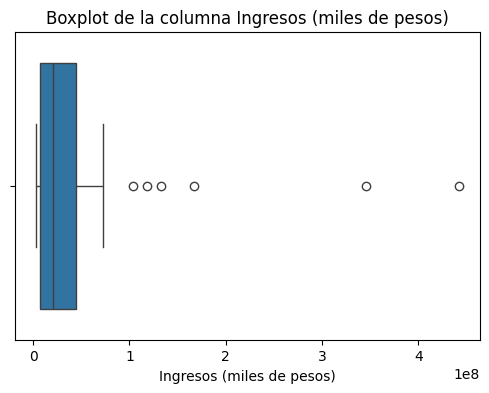

In [58]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [59]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
Trimestre_Label              0
dtype: int64


In [60]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Ingresos .csv


In [61]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                          1.200536
Trimestre                    0.070729
Ingresos (miles de pesos)    3.381631
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                           3.303769
Trimestre                    -1.371727
Ingresos (miles de pesos)    12.292935
dtype: float64


In [62]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                    Variable            VIF
0                      const  468453.118970
1                        Año       1.560578
2                  Trimestre       1.022821
3  Ingresos (miles de pesos)       1.548748


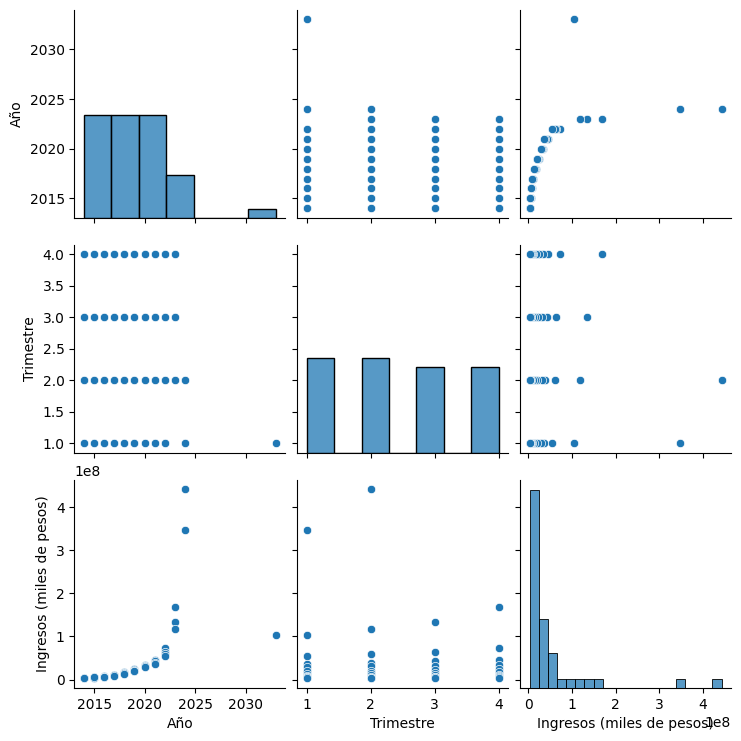

In [63]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [64]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Periodo':
                Año                                                      \
              count    mean std     min     25%     50%     75%     max   
Periodo                                                                   
Abr-Jun 2014    1.0  2014.0 NaN  2014.0  2014.0  2014.0  2014.0  2014.0   
Abr-Jun 2015    1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Abr-Jun 2016    1.0  2016.0 NaN  2016.0  2016.0  2016.0  2016.0  2016.0   
Abr-Jun 2017    1.0  2017.0 NaN  2017.0  2017.0  2017.0  2017.0  2017.0   
Abr-Jun 2018    1.0  2018.0 NaN  2018.0  2018.0  2018.0  2018.0  2018.0   
Abr-Jun 2019    1.0  2019.0 NaN  2019.0  2019.0  2019.0  2019.0  2019.0   
Abr-Jun 2020    1.0  2020.0 NaN  2020.0  2020.0  2020.0  2020.0  2020.0   
Abr-Jun 2021    1.0  2021.0 NaN  2021.0  2021.0  2021.0  2021.0  2021.0   
Abr-Jun 2022    1.0  2022.0 NaN  2022.0  2022.0  2022.0  2022.0  2022.0   
Abr-Jun 2024    1.0  2024.0 NaN  2024.0  2024.0  2024.0  2024.

In [65]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Periodo':
                  Año  Trimestre  Ingresos (miles de pesos)
Periodo                                                    
Abr-Jun 2014   2014.0        2.0                  3270816.0
Abr-Jun 2015   2015.0        2.0                  4701790.0
Abr-Jun 2016   2016.0        2.0                  6534240.0
Abr-Jun 2017   2017.0        2.0                  9678646.0
Abr-Jun 2018   2018.0        2.0                 14319467.0
Abr-Jun 2019   2019.0        2.0                 20743117.0
Abr-Jun 2020   2020.0        2.0                 32102475.0
Abr-Jun 2021   2021.0        2.0                 38239666.0
Abr-Jun 2022   2022.0        2.0                 60419500.0
Abr-Jun 2024   2024.0        2.0                442032166.0
Ene-Mar 2014   2014.0        1.0                  2984054.0
Ene-Mar 2015   2015.0        1.0                  4876385.0
Ene-Mar 2016   2016.0        1.0                  5936844.0
Ene-Mar 2017   2017.0        1.0                  8701201.0
En

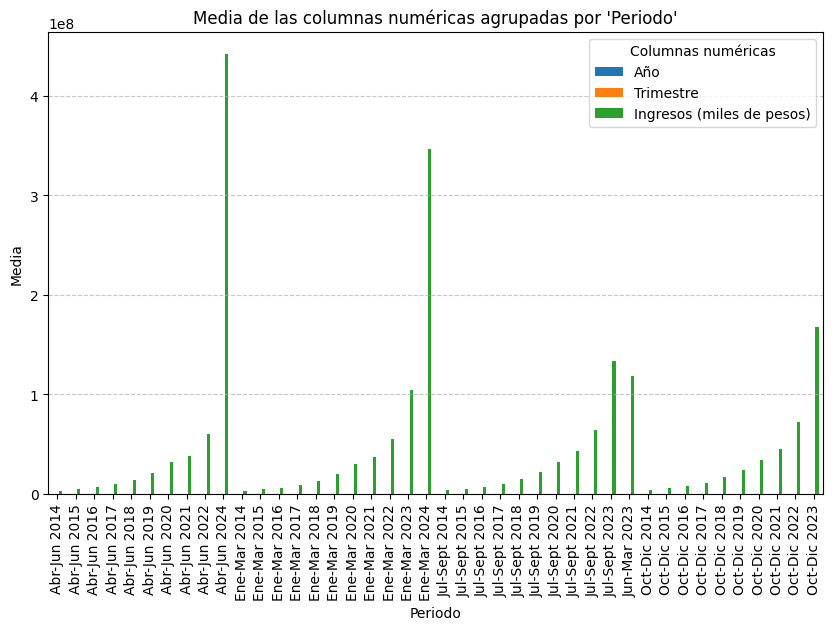


Estadísticas por grupo de 'Trimestre_Label':
                         Año  Trimestre  Ingresos (miles de pesos)
Trimestre_Label                                                   
Q1               2019.909091        1.0               5.709575e+07
Q2               2019.000000        2.0               6.819111e+07
Q3               2018.500000        3.0               3.348653e+07
Q4               2018.500000        4.0               3.876715e+07


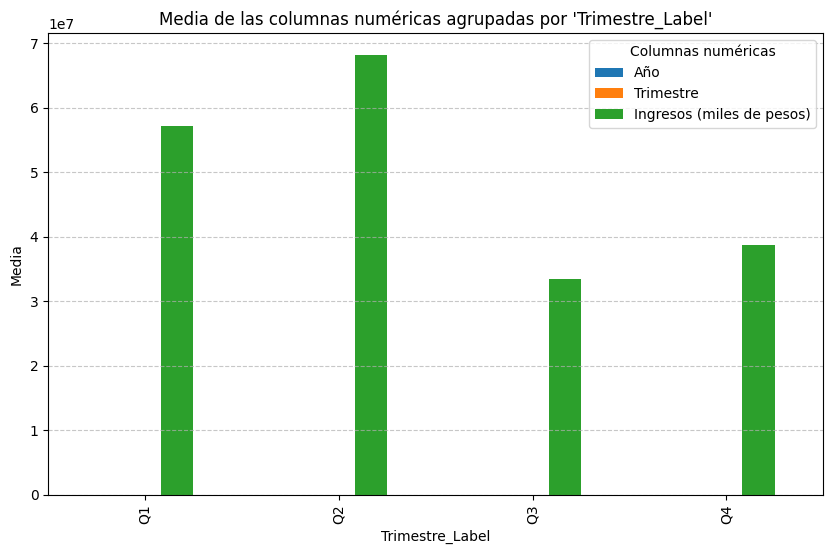

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Análisis de Datos de Ingresos

Este Jupyter Notebook realiza un análisis exhaustivo de un conjunto de datos de ingresos. A continuación se describen los pasos y procesos realizados en el notebook.

## Contenido del Notebook

1. **Cargar el archivo y normalizar los nombres**: Se carga el archivo CSV y se normalizan los nombres de las columnas.
2. **Verificación y conversión de columnas**: Se verifica la existencia de la columna `Trimestre` y se convierte a tipo `int64` si es necesario.
3. **Creación de etiquetas descriptivas**: Se crea una nueva columna `Trimestre_Label` basada en los valores de `Trimestre`.
4. **Mostrar información básica del DataFrame**: Se muestra información básica del DataFrame.
5. **Normalización de nombres de columnas**: Se normalizan los nombres de las columnas `Provincia`, `Partido` y `Localidad`.
6. **Reemplazo de variaciones específicas**: Se reemplazan variaciones específicas en las columnas `Provincia`, `Partido` y `Localidad`.
7. **Estadísticas descriptivas y análisis exploratorio**: Se generan estadísticas descriptivas y se visualizan histogramas de las columnas numéricas.
8. **Cálculo y visualización de la correlación**: Se calcula y visualiza la matriz de correlación entre columnas numéricas.
9. **Tablas de contingencia y mapas de calor**: Se generan tablas de contingencia y mapas de calor para columnas categóricas.
10. **Cálculo de Z-scores**: Se calculan y visualizan los Z-scores de las columnas numéricas.
11. **Conteo de categorías**: Se cuenta el número de categorías en las columnas de tipo `object`.
12. **Revisión de valores negativos**: Se revisan y visualizan las columnas con valores negativos.
13. **Reemplazo de valores negativos**: Se reemplazan los valores negativos por `NaN`.
14. **Guardado de cambios**: Se guardan los cambios en el archivo CSV original.
15. **Análisis de distribuciones**: Se analiza la asimetría (skewness) y la curtosis (kurtosis) de las columnas numéricas.
16. **Verificación de multicolinealidad**: Se verifica la existencia de multicolinealidad entre variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).
17. **Visualización de relaciones entre variables**: Se visualizan las relaciones entre variables numéricas utilizando pairplots.
18. **Agrupamiento por categorías**: Se generan estadísticas descriptivas agrupadas por columnas categóricas.
19. **Verificación de duplicados**: Se verifica la existencia de filas duplicadas en el DataFrame.

## Instrucciones de Uso

1. **Requisitos**: Asegúrate de tener instaladas las siguientes librerías:
    - pandas
    - numpy
    - matplotlib
    - seaborn
    - scipy
    - statsmodels

2. **Ejecución**: Ejecuta cada celda del notebook en orden para realizar el análisis completo del conjunto de datos.

3. **Archivo de Datos**: Reemplaza el nombre del archivo `Ingresos .csv` con el nombre del archivo que deseas analizar y asegúrate de que el archivo se encuentra en la ruta especificada.

## Notas

- Asegúrate de revisar y ajustar las rutas de los archivos según tu entorno de trabajo.
- Puedes agregar o modificar los reemplazos específicos en las columnas `Provincia`, `Partido` y `Localidad` según sea necesario.

## Autor

Este notebook fue desarrollado por Harry Guevara.


## Observaciones y Conclusiones

### Observaciones

1. **Calidad de los Datos**:
    - Se encontraron y reemplazaron valores negativos en las columnas numéricas, lo cual es crucial para evitar sesgos en el análisis.
    - Se identificaron y normalizaron variaciones en los nombres de las columnas `Provincia`, `Partido` y `Localidad`, mejorando la consistencia de los datos.

2. **Distribución de los Datos**:
    - Las distribuciones de las columnas numéricas mostraron diferentes niveles de asimetría (skewness) y curtosis (kurtosis), indicando la presencia de datos sesgados y posibles valores atípicos.
    - La visualización de histogramas y boxplots ayudó a identificar estas características.

3. **Correlación y Multicolinealidad**:
    - Se calculó la matriz de correlación para las columnas numéricas, revelando relaciones significativas entre algunas variables.
    - La verificación de multicolinealidad mediante el Factor de Inflación de la Varianza (VIF) indicó que algunas variables pueden estar altamente correlacionadas, lo cual es importante considerar en modelos predictivos.

4. **Agrupamiento y Análisis Categórico**:
    - Se realizaron análisis descriptivos agrupados por categorías, proporcionando una visión detallada de cómo se comportan las variables numéricas dentro de cada grupo.
    - Las tablas de contingencia y los mapas de calor facilitaron la visualización de relaciones entre variables categóricas.

### Conclusiones

1. **Limpieza y Preparación de Datos**:
    - La limpieza y normalización de los datos son pasos fundamentales para asegurar la calidad y consistencia del análisis.
    - Reemplazar valores negativos y manejar valores nulos son prácticas esenciales para evitar errores en el análisis.

2. **Análisis Exploratorio**:
    - El análisis exploratorio de datos (EDA) es crucial para entender la distribución y las relaciones entre las variables.
    - Las visualizaciones como histogramas, boxplots y pairplots son herramientas efectivas para identificar patrones y anomalías en los datos.

3. **Importancia de la Correlación**:
    - Identificar correlaciones entre variables ayuda a entender mejor las interdependencias y puede guiar la selección de variables en modelos predictivos.
    - La multicolinealidad debe ser manejada adecuadamente para evitar problemas en la interpretación de los modelos.

4. **Análisis Categórico**:
    - Agrupar y analizar datos por categorías proporciona insights valiosos sobre cómo diferentes grupos se comportan y contribuyen al conjunto de datos.
    - Las tablas de contingencia y los mapas de calor son útiles para visualizar y entender las relaciones entre variables categóricas.

Este análisis proporciona una base sólida para futuras investigaciones y modelos predictivos, asegurando que los datos sean de alta calidad y que las relaciones entre variables sean bien comprendidas.